Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Dividing Data...
(0, Variable containing:
 0.3544
[torch.FloatTensor of size 1]
)
(89.62727272727273, 90.66, 89.99)
(5, Variable containing:
 0.2209
[torch.FloatTensor of size 1]
)
(92.87272727272727, 93.64, 92.75)
(10, Variable containing:
1.00000e-02 *
  9.6723
[torch.FloatTensor of size 1]
)
(94.24545454545455, 94.58, 93.76)
(15, Variable containing:
 0.1266
[torch.FloatTensor of size 1]
)
(94.75818181818182, 94.98, 94.26)
(20, Variable containing:
1.00000e-02 *
  8.9280
[torch.FloatTensor of size 1]
)
(95.17272727272727, 95.06, 94.63)
(25, Variable containing:
1.00000e-02 *
  3.5509
[torch.FloatTensor of size 1]
)
(95.28727272727272, 95.3, 94.36)
(Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  

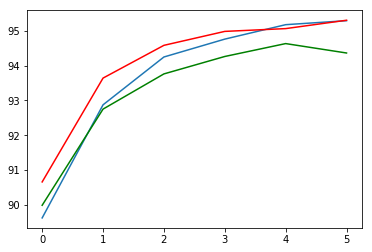

In [5]:
import torch
from torch.autograd import Variable
import numpy as np
import pickle
import torch.nn as nn
import torch.optim as optim

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

train = mnist.train.images
train_labels = mnist.train.labels

valid = mnist.validation.images
valid_labels = mnist.validation.labels

test = mnist.test.images
test_labels = mnist.test.labels

def unOneHot(labels):
        classes = []
        for label in labels:
            classes.append(np.argmax(label))
        classes = np.array(classes)
        return np.array(classes).astype(float)


def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/predictions.shape[0])

print('Dividing Data...')

N, D_in, H1, H2, H3, D_out = None, mnist.train.images.shape[1], 800, 600, 20, 10

train_x = Variable(torch.Tensor(train))
train_y = Variable(torch.Tensor(train_labels))

valid_x = Variable(torch.Tensor(valid))
valid_y = Variable(torch.Tensor(valid_labels))

test_x = Variable(torch.Tensor(test))
test_y = Variable(torch.Tensor(test_labels))




model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.Tanh(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(H1, H2),
    torch.nn.Tanh(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(H2, D_out),
    torch.nn.LogSoftmax(),
)

multiLabelLoss = torch.nn.NLLLoss()
optimizer = optim.Adam(model.parameters())


learning_rate = 0.01
batch_size = 128
total_training_samples = 14281
"""x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])
print(x.shape, y.shape)"""
results = []
for t in range(30):
    i = 0
    while i < total_training_samples:
        batch = train[i : i + batch_size]
        batch_labels = train_labels[i : i + batch_size]
        batch_labels = unOneHot(batch_labels)
        x = Variable(torch.Tensor(batch))
        y = Variable(torch.Tensor(batch_labels), requires_grad = False).type(torch.LongTensor)
        i += batch_size
        y_pred = model(x)
        loss = multiLabelLoss(y_pred, y)
        #print(loss, end = '\r')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if not t%5:
        print(t, loss)
        train_pred = model(train_x)
        tracc = accuracy(train_pred.data.numpy(), train_labels)
        valid_pred = model(valid_x)
        vacc = accuracy(valid_pred.data.numpy(), valid_labels)
        #print(valid_pred.data.numpy())
        #raise ValueError
        test_pred = model(test_x)
        tacc = accuracy(test_pred.data.numpy(), test_labels)
        print(tracc, vacc, tacc)
        results.append((tracc, vacc, tacc))
y_pred = model(x)
print(x, y_pred)
results = np.array(results)
import matplotlib.pyplot as plt
#pickle.dump(results, open("TorchSwitchingAct.pickle", "wb"))
plt.plot(results[:, 0])
plt.plot(results[:, 1], 'r')
plt.plot(results[:, 2], 'g')
plt.show()

(0, Variable containing:
 1.1408
[torch.FloatTensor of size 1]
)
(44.76190476190476, 13.636363636363637, 13.043478260869565)
(5, Variable containing:
 1.0490
[torch.FloatTensor of size 1]
)
(40.0, 13.636363636363637, 21.73913043478261)
(10, Variable containing:
 1.3756
[torch.FloatTensor of size 1]
)
(52.38095238095238, 36.36363636363637, 39.130434782608695)
(15, Variable containing:
 1.1733
[torch.FloatTensor of size 1]
)
(50.476190476190474, 45.45454545454545, 43.47826086956522)
(20, Variable containing:
 1.3283
[torch.FloatTensor of size 1]
)
(42.857142857142854, 36.36363636363637, 43.47826086956522)
(25, Variable containing:
 1.0268
[torch.FloatTensor of size 1]
)
(57.142857142857146, 27.272727272727273, 52.17391304347826)
(30, Variable containing:
 1.0023
[torch.FloatTensor of size 1]
)
(53.333333333333336, 59.09090909090909, 56.52173913043478)
(35, Variable containing:
 0.9264
[torch.FloatTensor of size 1]
)
(51.42857142857143, 63.63636363636363, 52.17391304347826)
(40, Variable 

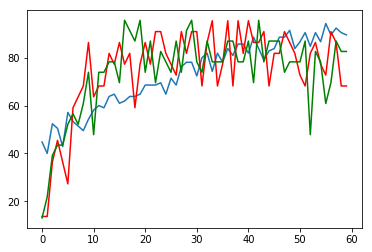

In [8]:
import numpy as np

def reformat(labels, num_labels):
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return np.array(labels).astype(float)


def datadownload():
    from sklearn import datasets
    iris = datasets.load_iris()
    data = iris.data
    
    labels = iris.target
    #labels = reformat(labels,3)
    
    train, train_labels = data[:int(data.shape[0]*0.7)], labels[:int(data.shape[0]*0.7)]
    valid, valid_labels = data[int(data.shape[0]*0.7):int(data.shape[0]*0.85)], labels[int(data.shape[0]*0.7):int(data.shape[0]*0.85)]
    test, test_labels = data[int(data.shape[0]*0.85):], labels[int(data.shape[0]*0.85):]
    return np.array(train), np.array(train_labels), np.array(valid), np.array(valid_labels), np.array(test), np.array(test_labels)

train,train_labels,valid,valid_labels,test,test_labels = datadownload()



import torch
from torch.autograd import Variable
import numpy as np
import pickle
import torch.nn as nn
import torch.optim as optim



N, D_in, H1, H2, H3, D_out = None, 4, 10, 20, 10, 3

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.Tanh(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(H1, H2),
    torch.nn.Tanh(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(H2, D_out),
    torch.nn.LogSoftmax(),
)

multiLabelLoss = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())



learning_rate = 0.01
batch_size = 50
total_training_samples = 150


train_x = Variable(torch.Tensor(train))
train_y = Variable(torch.Tensor(train_labels))

valid_x = Variable(torch.Tensor(valid))
valid_y = Variable(torch.Tensor(valid_labels))

test_x = Variable(torch.Tensor(test))
test_y = Variable(torch.Tensor(test_labels))


def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/predictions.shape[0])

import copy
    
train_labels2 = copy.deepcopy(train_labels)
valid_labels2 = copy.deepcopy(valid_labels)
test_labels2 = copy.deepcopy(test_labels)

train_labels2 = reformat(train_labels2,3)
valid_labels2 = reformat(valid_labels2,3)
test_labels2 = reformat(test_labels2,3)

results = []

for t in range(300):
    i = 0
    while i < total_training_samples:
        batch = train[i : i + batch_size]
        batch_labels = train_labels[i : i + batch_size]
        #batch_labels = unOneHot(batch_labels)
        x = Variable(torch.Tensor(batch))
        y = Variable(torch.Tensor(batch_labels), requires_grad = False).type(torch.LongTensor)
        i += batch_size
        y_pred = model(x)
        
        loss = multiLabelLoss(y_pred, y)
        #print(loss, end = '\r')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if not t%5:
        print(t, loss)
        train_pred = model(train_x)
        
        
        tracc = accuracy(train_pred.data.numpy(), train_labels2)
        valid_pred = model(valid_x)
        
        
        
        vacc = accuracy(valid_pred.data.numpy(), valid_labels2)
        #print(valid_pred.data.numpy())
        #raise ValueError
        test_pred = model(test_x)
        
        
        
        tacc = accuracy(test_pred.data.numpy(), test_labels2)
        print(tracc, vacc, tacc)
        results.append((tracc, vacc, tacc))
y_pred = model(x)
print(x, y_pred)
results = np.array(results)
import matplotlib.pyplot as plt
#pickle.dump(results, open("TorchSwitchingAct.pickle", "wb"))
plt.plot(results[:, 0])
plt.plot(results[:, 1], 'r')
plt.plot(results[:, 2], 'g')
plt.show()